In [1]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pandas import get_dummies
import plotly.graph_objs as go 
from sklearn import datasets
import plotly.plotly as py
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings 
import sklearn 
import scipy
import numpy 
import json 
import sys
import csv 
import os

C:\Users\A\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
# print out version
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 2.2.2
sklearn: 0.20.0
scipy: 1.1.0
seaborn: 0.9.0
pandas: 0.23.4
numpy: 1.12.1
Python: 3.5.6 |Anaconda, Inc.| (default, Aug 26 2018, 19:24:31) [MSC v.1900 32 bit (Intel)]


In [3]:
## Exploratory Data Analysis(EDA)
# Data collection
# Read in data by pandas
dataset = pd.read_table("winequality-red.csv", sep=";")


In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [7]:
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

C:\Users\A\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



<function matplotlib.pyplot.show(*args, **kw)>

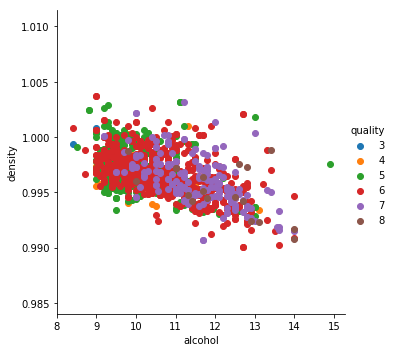

In [8]:
# let's do some visualization
sns.FacetGrid(dataset, hue='quality', size=5).map(plt.scatter,
                                                 'alcohol',
                                                 'density').add_legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

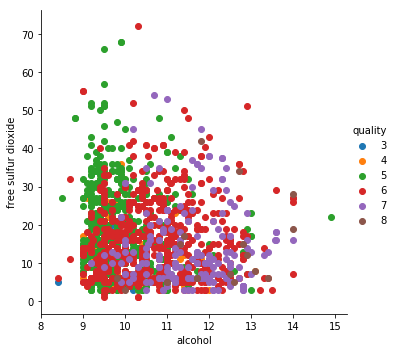

In [9]:
sns.FacetGrid(dataset, hue='quality', height=5).map(plt.scatter,
                                                 'alcohol',
                                                 'free sulfur dioxide').add_legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

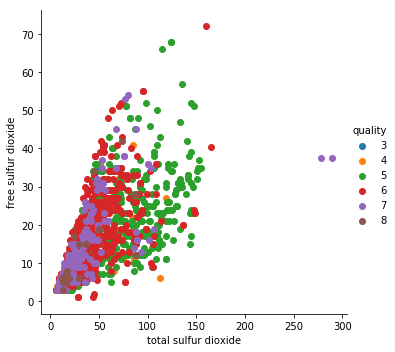

In [10]:
sns.FacetGrid(dataset, hue='quality', height=5).map(plt.scatter,
                                                 'total sulfur dioxide',
                                                 'free sulfur dioxide').add_legend()
plt.show

The plot above draw a strong positive realtionship between total-sulfur-dioxide and the quality of wine, plus alcohol and density therefore we will need further anaysis to make an asumpution 

 Box in deciptive stastics a box plot is a methode for graphically depicitng group of numerical data through thier quartile.

<Figure size 1440x1440 with 0 Axes>

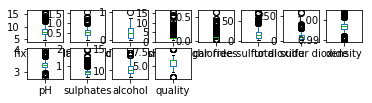

<Figure size 1440x1440 with 0 Axes>

In [11]:
%matplotlib inline
dataset.plot(kind='box', subplots=True, layout=(6,8),sharex=False, sharey=False)
plt.figure(figsize=(20,20))

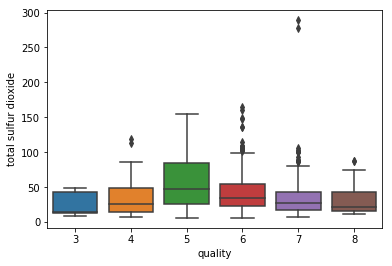

In [12]:
# To plot the species data using a box plot:

sns.boxplot(x='quality', y='total sulfur dioxide', data=dataset)
plt.show()

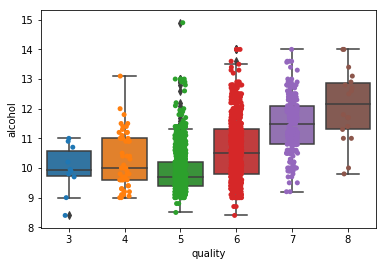

In [13]:
# Use Seaborn's striplot to add data points on top of the box plot 
# Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
# Assign ax to each axis, so that each plot is ontop of the previous axis.

ax = sns.boxplot(x='quality', y='alcohol', data=dataset)
ax = sns.stripplot(x='quality', y='alcohol', data=dataset, jitter=True, edgecolor='grey')
plt.show()

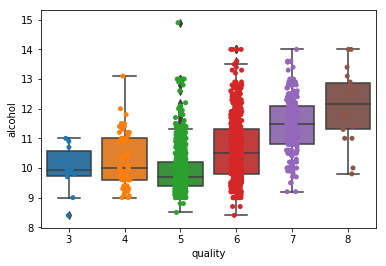

In [14]:
# Tweek the plot above to change fill and border color color using ax.artists.
# Assing ax.artists a variable name, and insert the box number into the corresponding brackets

ax = sns.boxplot(x='quality', y='alcohol', data=dataset)
ax = sns.stripplot(x='quality', y='alcohol', data=dataset, jitter=True, edgecolor='grey')
plt.show()

boxtwo = ax.artists[2]
boxtwo.set_facecolor('red')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('yellow')
boxthree.set_edgecolor('black')

plt.show()

We can also create a histogram of each input variable to get an idea of the distribution.

<Figure size 432x288 with 0 Axes>

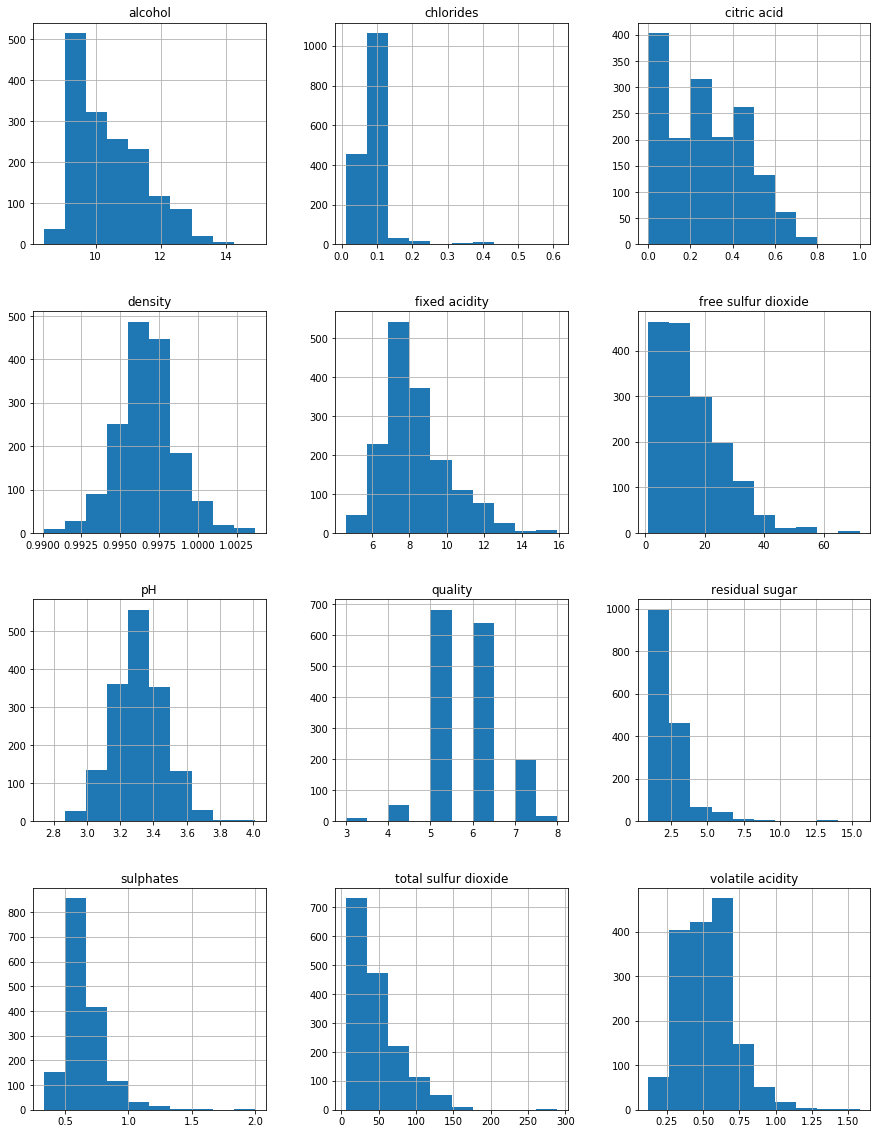

<Figure size 432x288 with 0 Axes>

In [15]:
dataset.hist(figsize=(15,20))
plt.figure()

 Histgraprh distrbuation above abviouse that the quality of the red wine definilty depends on recipe and amounts of componots thet added to the wine


It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.

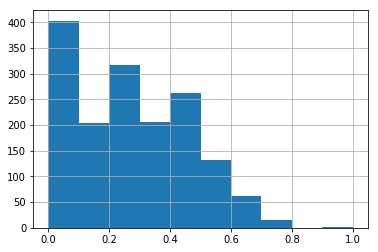

In [16]:
dataset['citric acid'].hist()

Multivariate Plots
Now we can look at the interactions between the variables.
First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

<Figure size 432x288 with 0 Axes>

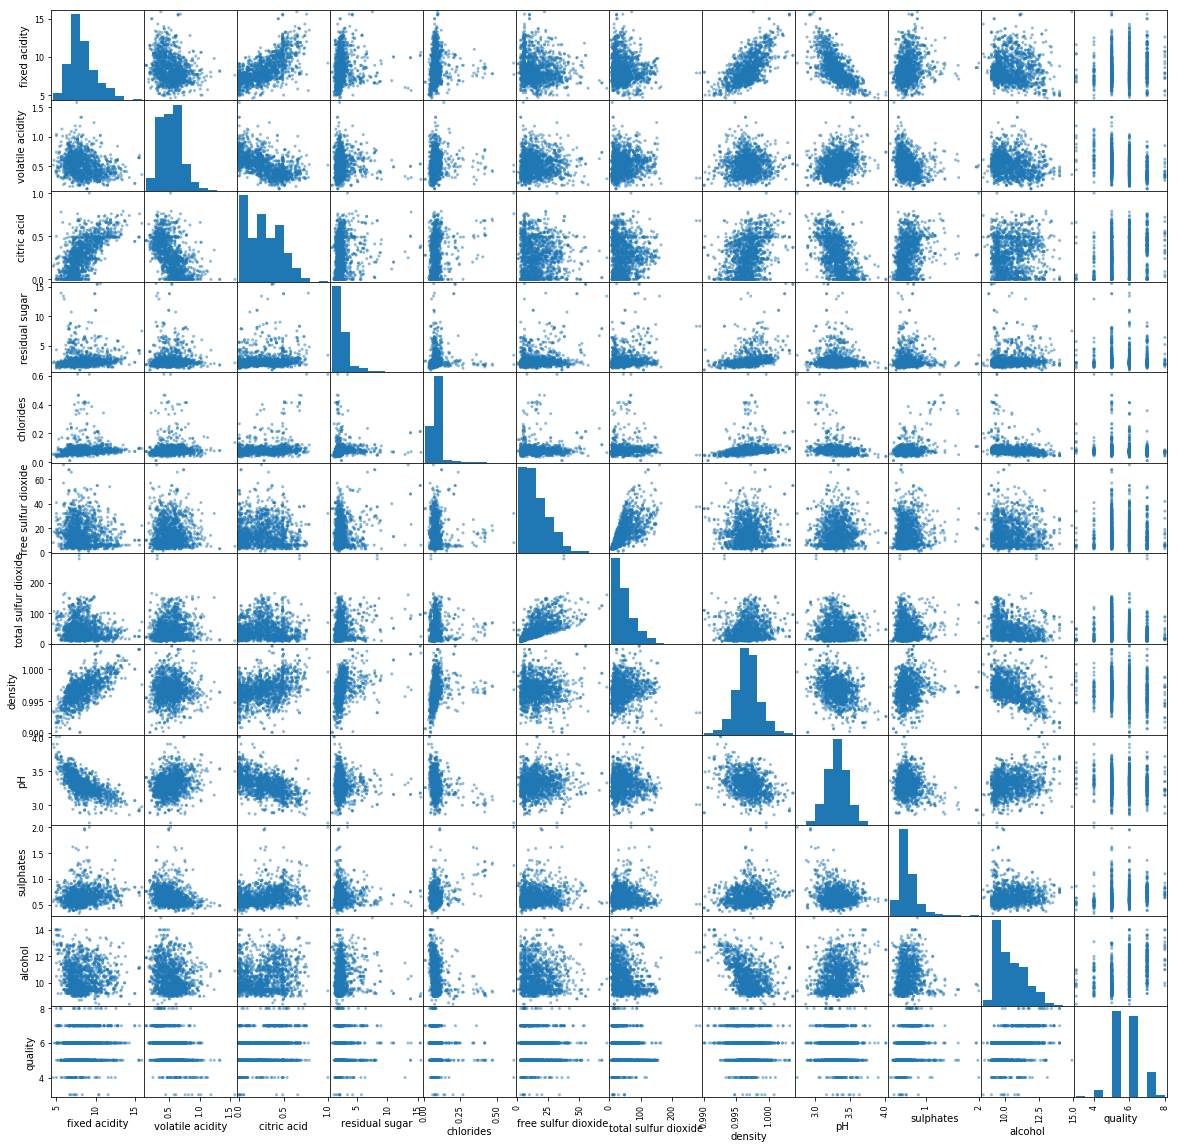

<Figure size 432x288 with 0 Axes>

In [17]:
# scatter plot matrix
pd.plotting.scatter_matrix(dataset, figsize=(20, 20))
plt.figure()

From the matrix plot above it reveal many correlation across the dataset wehther positive or negative.

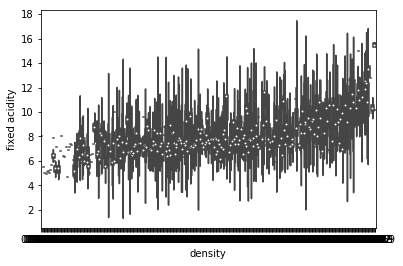

In [18]:
# violinplots
# violinplots on petal-length for each species
sns.violinplot(data=dataset, x='density', y='fixed acidity')

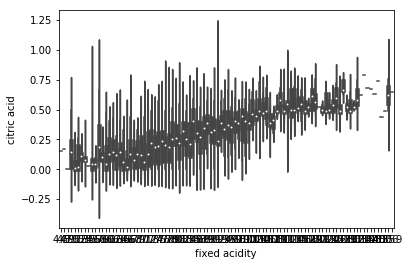

In [19]:
sns.violinplot(data=dataset, x='fixed acidity', y='citric acid')

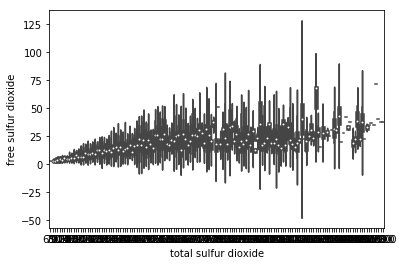

In [20]:
sns.violinplot(data=dataset, x='total sulfur dioxide', y='free sulfur dioxide')

C:\Users\A\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\A\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



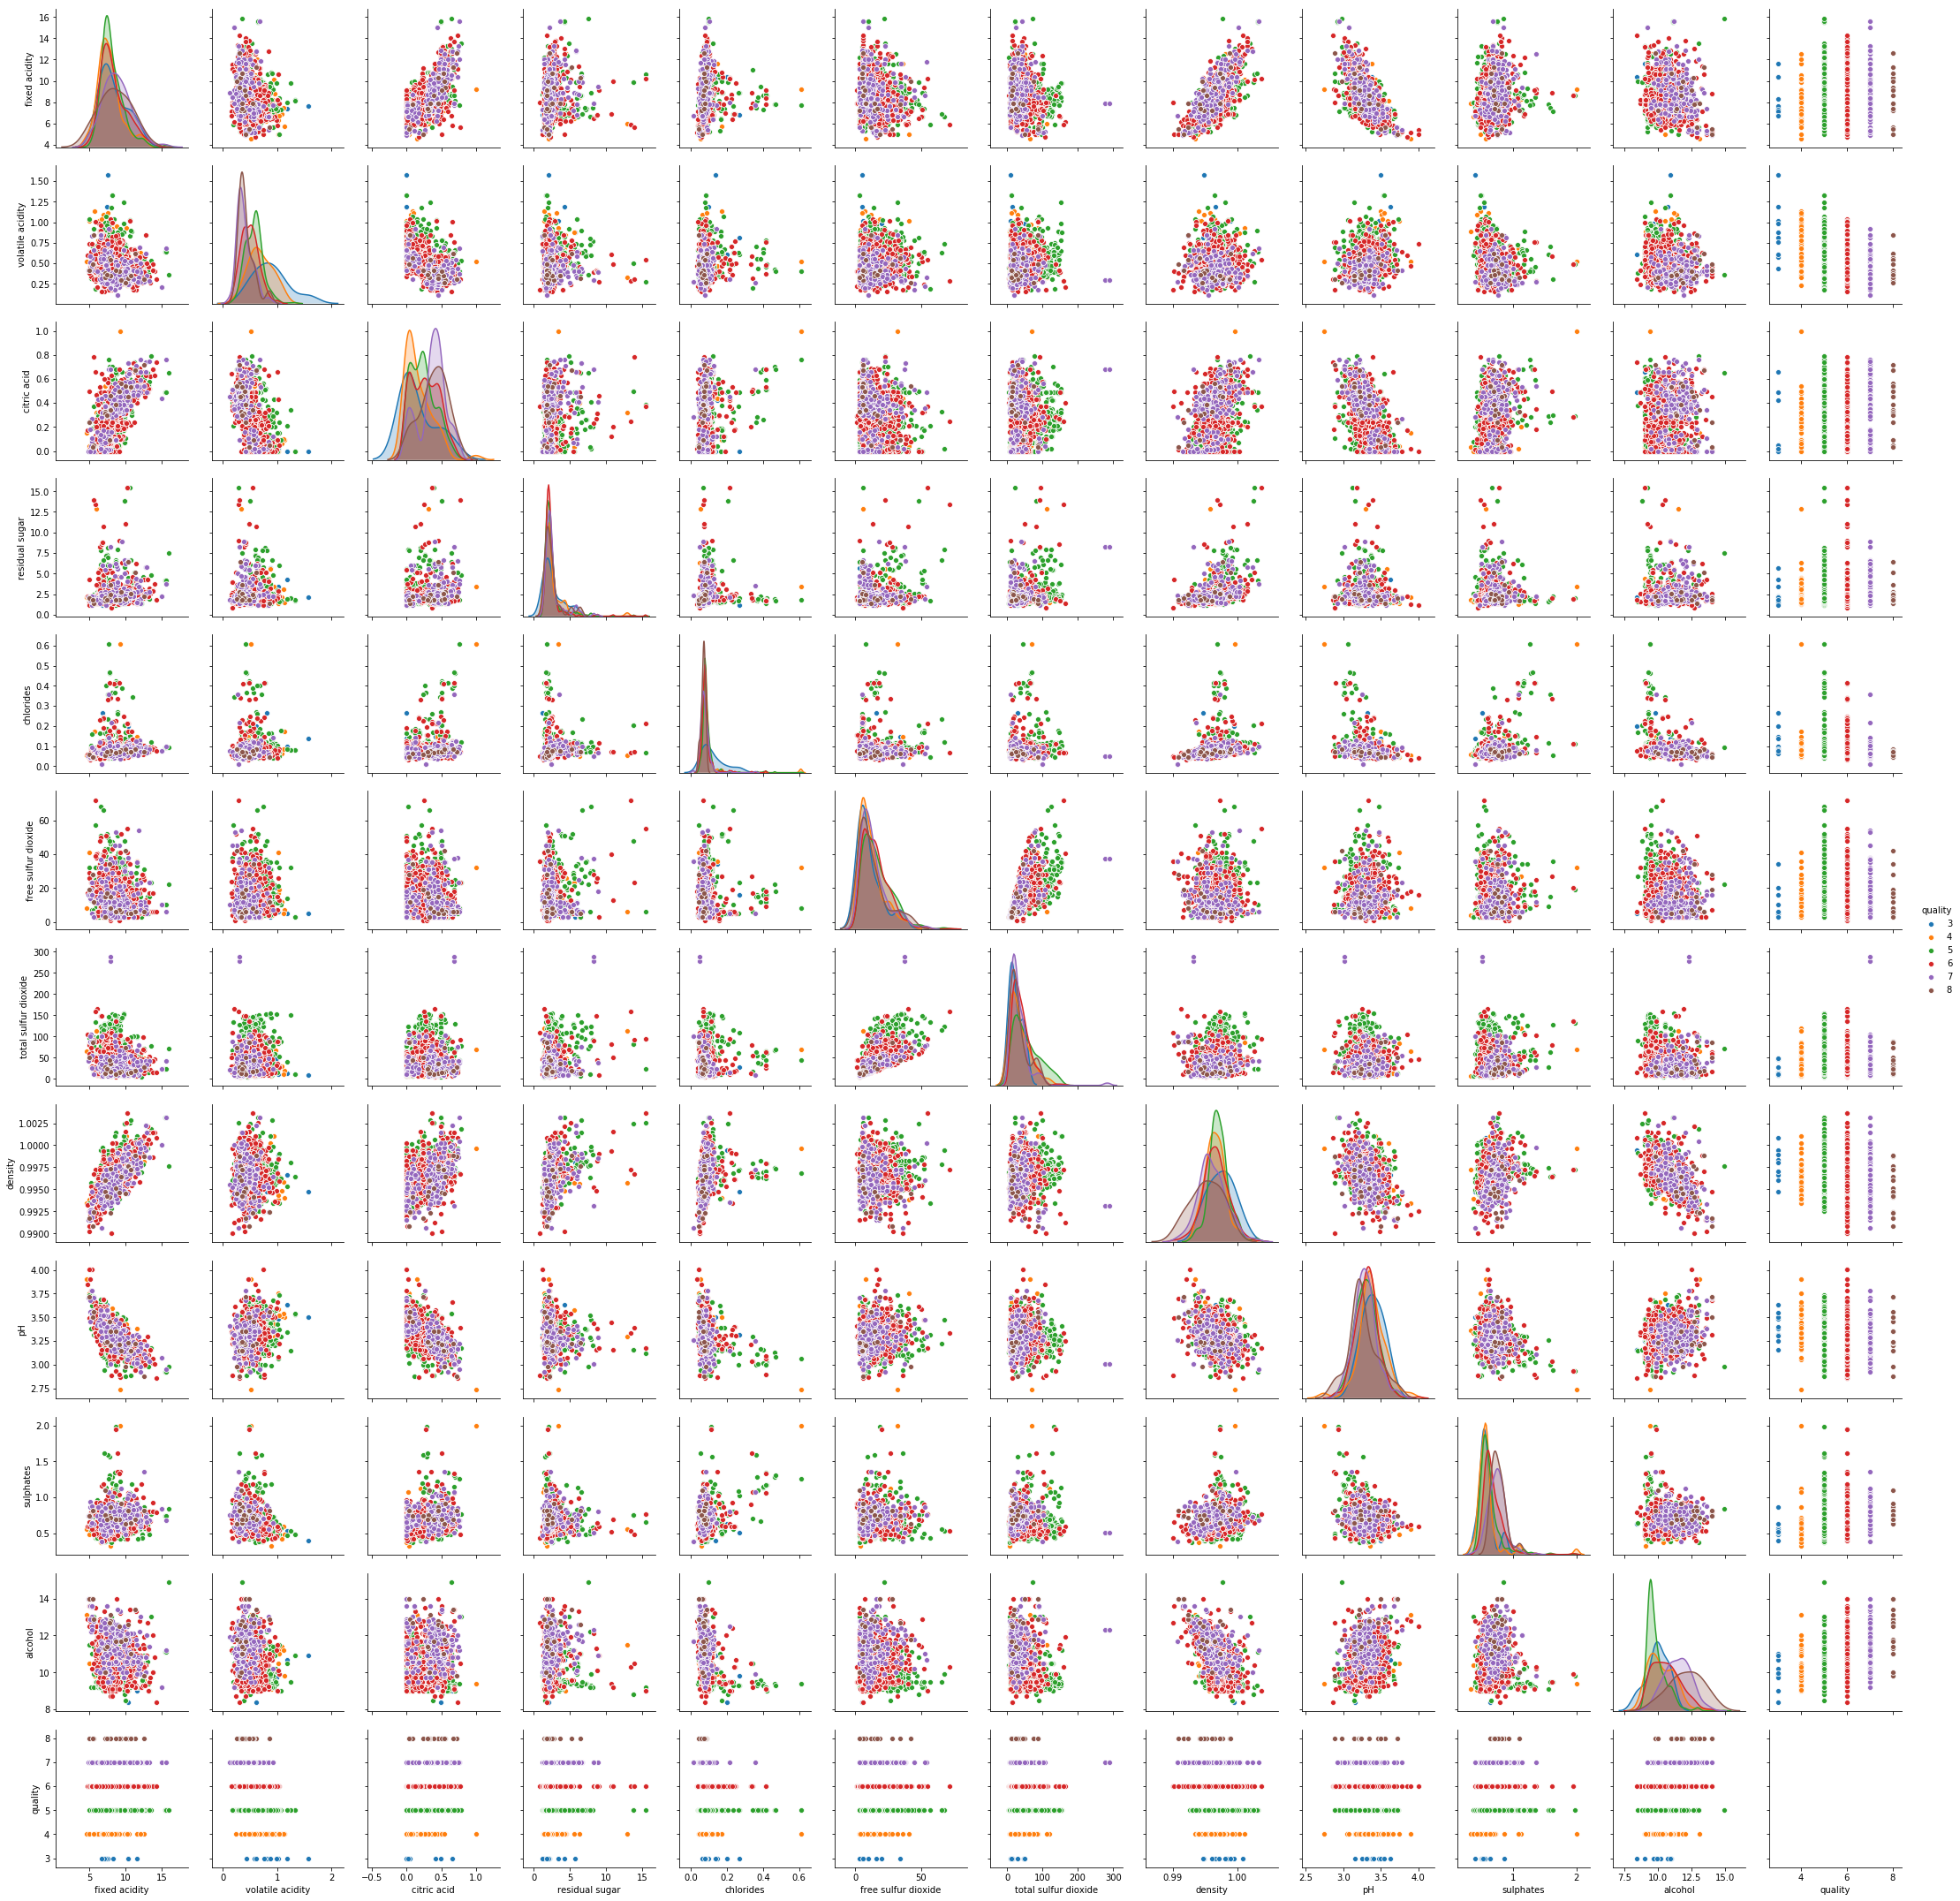

In [21]:
# pairplot
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(dataset, hue='quality')


from the plot we can tell that the totle-slfur-dioxide, free-sulfur-dixide and density are play major rule across all feature combinations
We can also replace the histograms shown in the diagonal of the pairplot by kde.

C:\Users\A\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\A\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



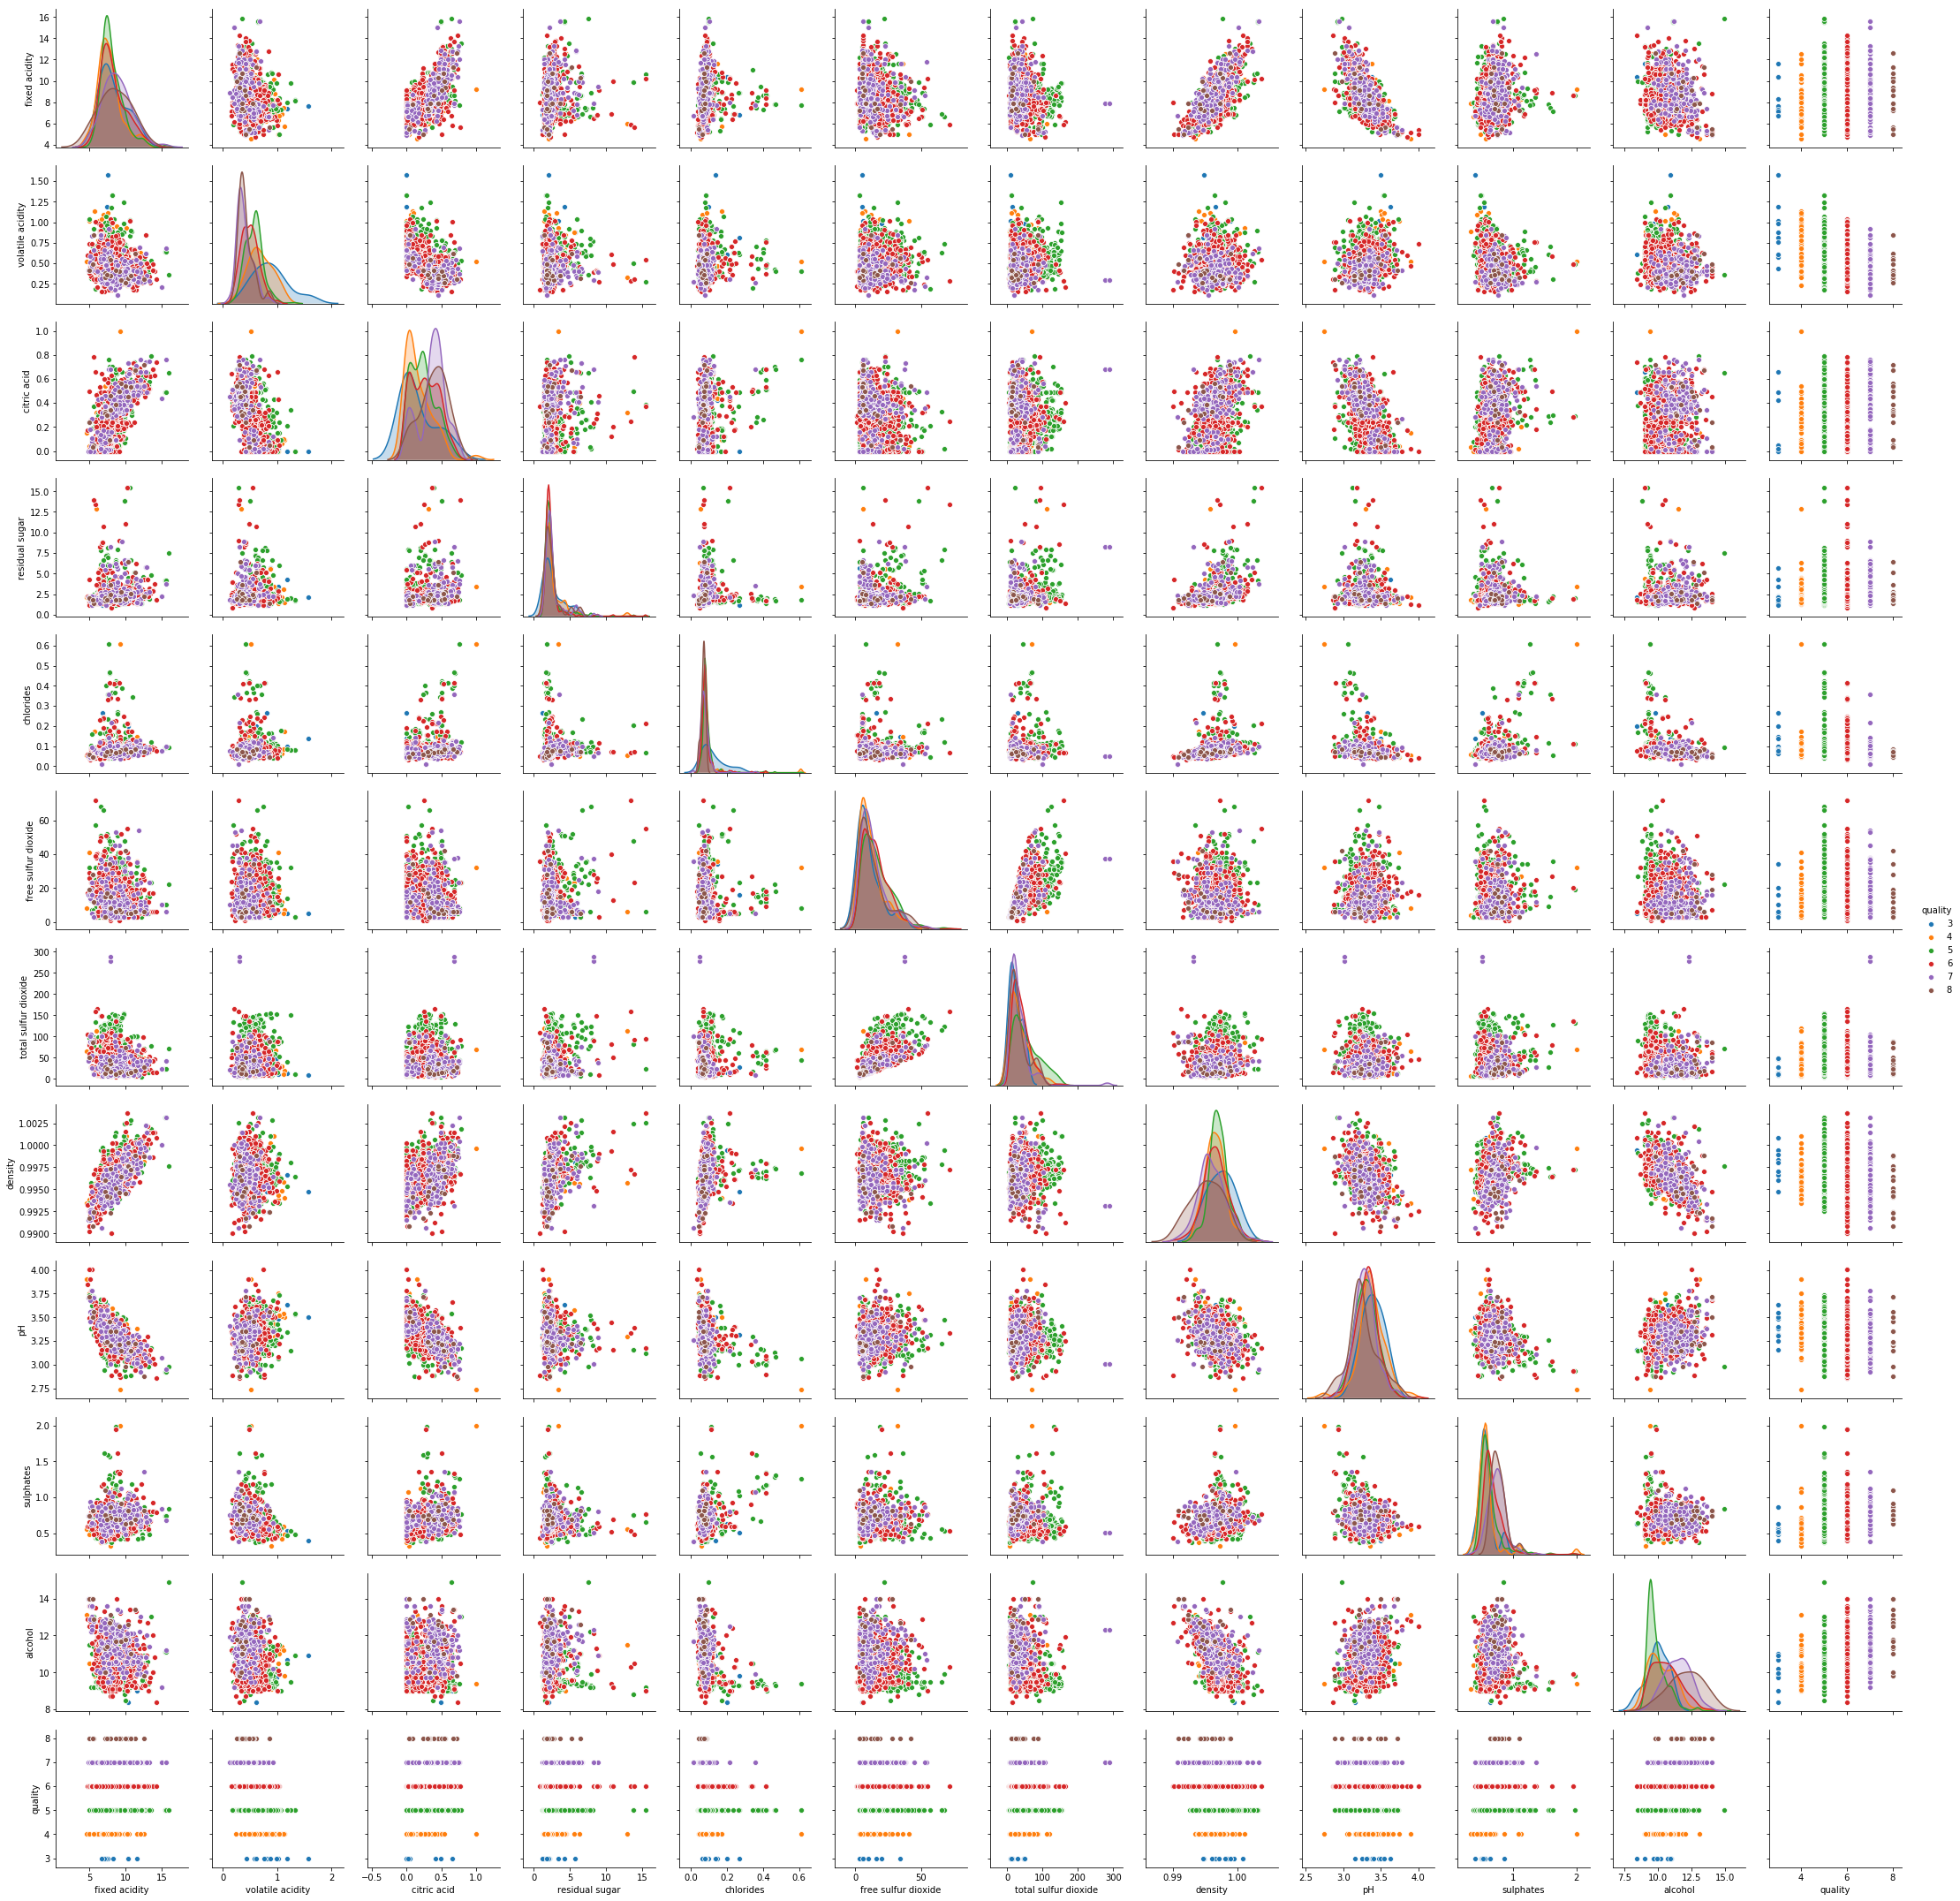

In [22]:
# updating the diagonal elements in a pairplot to show a kde
sns.pairplot(dataset, hue="quality",diag_kind="kde")

C:\Users\A\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



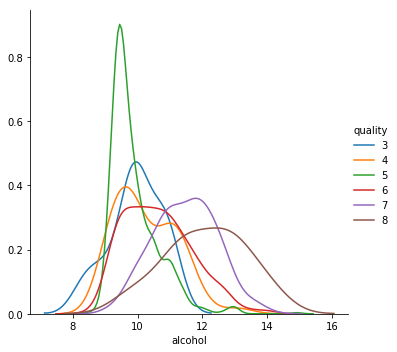

In [23]:
# kdeplot
# seaborn's kdeplot, plots univariate or bivariate density estimates.
#Size can be changed by tweeking the value used
sns.FacetGrid(dataset, hue='quality', size=5).map(sns.kdeplot, 'alcohol').add_legend()
plt.show()

C:\Users\A\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



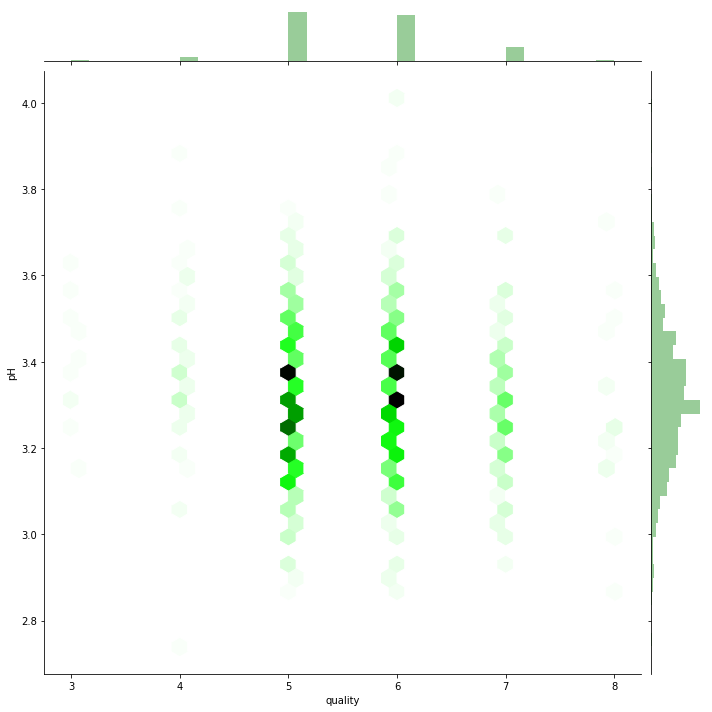

In [24]:
# jointplot
# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.
sns.jointplot(x='quality', y='pH', data=dataset, size=10,ratio=10, kind='hex', color='green')
plt.show()


C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.



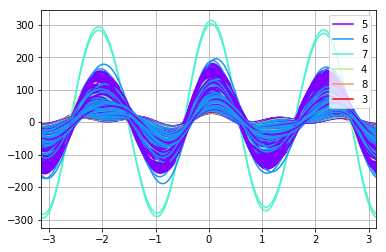

In [25]:
# andrews_curves
#In Pandas use Andrews Curves to plot and visualize data structure.
#Each multivariate observation is transformed into a curve and represents the coefficients of a Fourier series.
#This useful for detecting outliers in times series data.
#Use colormap to change the color of the curves
from pandas.tools.plotting import andrews_curves
andrews_curves(dataset, 'quality', colormap='rainbow')
plt.show()

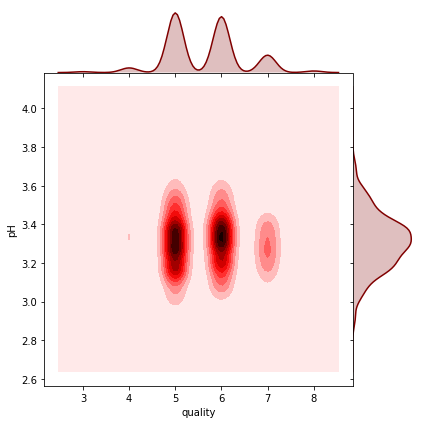

In [26]:
# we will use seaborn jointplot shows bivariate scatterplots and univariate histograms with Kernel density 
# estimation in the same figure
sns.jointplot(x="quality", y="pH", data=dataset, height=6, kind='kde', color='#800000', space=0)

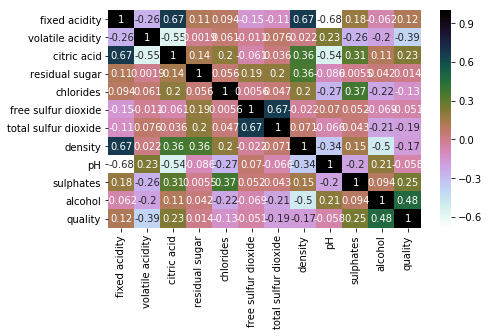

In [27]:
# 10 Heatmap
#draws  heatmap with input as the correlation matrix calculted by(iris.corr())

plt.figure(figsize=(7,4))
sns.heatmap(dataset.corr(),annot=True, cmap='cubehelix_r')
plt.show()


C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.



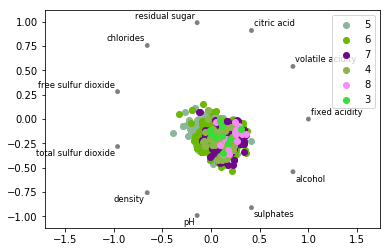

In [28]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(dataset, 'quality')

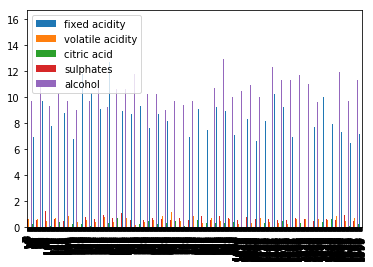

In [56]:
# From the plots above these are five feature assiosite closely with
# with the red wine quality above 6 starts!
dataset.iloc[:, [0,1,2,9,10]].plot(kind='bar')

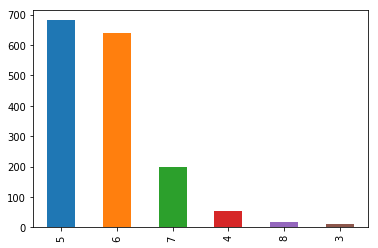

In [55]:
dataset['quality'].value_counts().plot(kind='bar')

In [60]:
## Visualization with Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from plotly import tools
import plotly.figure_factory as ff

In [71]:
X = dataset.pH[:,:2]
y = dataset.quality

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
trace = go.Scatter(x=X[:, 0],
                   y=X[:, 1],
                   mode='markers',
                   marker=dict(color=np.random.randn(150),
                               size=10,
                               colorscale='Viridis',
                               showscale=False))
layout = go.Layout(title='Training Points',
                   xaxis=dict(title='quality',
                            showgrid=False),
                   yaxis=dict(title='qulaity only',
                            showgrid=False),
                  )
 
fig = go.Figure(data=[trace], layout=layout)


ValueError: Can only tuple-index with a MultiIndex

In [72]:
# Data Preprocessing
dataset.shape

(1599, 12)

In [73]:
dataset.size

19188

In [74]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [75]:
# We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.
# we should see 1599 feature and 12 attribute 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [77]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [78]:
dataset.groupby('quality').count()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                   10                10           10              10   
4                   53                53           53              53   
5                  681               681          681             681   
6                  638               638          638             638   
7                  199               199          199             199   
8                   18                18           18              18   

         chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  \
quality                                                                       
3               10                   10                    10       10   10   
4               53                   53                    53       53   53   
5              681                  681                   681      681  681   
6              638                  638                   638      638  638   
7              199                  199                   199      199  199   
8               18                   18                    18       18   18   

         sulphates  alcohol  
quality                      
3               10       10  
4               53       53  
5              681      681  
6              638      638  
7              199      199  
8               18       18

In [79]:
dataset[dataset['quality']> 6]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
16              8.5             0.280         0.56            1.80      0.092   
37              8.1             0.380         0.28            2.10      0.066   
62              7.5             0.520         0.16            1.90      0.085   
128             8.0             0.590         0.16            1.80      0.065   
198             5.4             0.835         0.08            1.20      0.046   
200             9.6             0.320         0.47            1.40      0.056   
205            12.8             0.300         0.74            2.60      0.095   
206            12.8             0.300         0.74            2.60      0.095   
209            11.0             0.300         0.58            2.10      0.054   
230             5.2             0.480         0.04            1.60      0.054   
243            15.0             0.210         0.44            2.20      0.075   
244            15.0             0.210         0.44            2.20      0.075   
259            10.0             0.310         0.47            2.60      0.085   
265            11.8             0.260         0.52            1.80      0.071   
267             7.9             0.350         0.46            3.60      0.078   
278            10.3             0.320         0.45            6.40      0.073   
279             8.9             0.400         0.32            5.60      0.087   
281             7.7             0.270         0.68            3.50      0.358   
283             8.9             0.400         0.32            5.60      0.087   
288             8.7             0.520         0.09            2.50      0.091   
290             8.7             0.520         0.09            2.50      0.091   
318             9.8             0.660         0.39            3.20      0.083   
320             9.8             0.660         0.39            3.20      0.083   
326            11.6             0.530         0.66            3.65      0.121   
334             7.9             0.650         0.01            2.50      0.078   
335            11.9             0.695         0.53            3.40      0.128   
339            12.5             0.280         0.54            2.30      0.082   
346             6.6             0.815         0.02            2.70      0.072   
...             ...               ...          ...             ...        ...   
1206            7.2             0.360         0.46            2.10      0.074   
1208            7.2             0.360         0.46            2.10      0.074   
1209            6.2             0.390         0.43            2.00      0.071   
1228            5.1             0.420         0.00            1.80      0.044   
1269            5.5             0.490         0.03            1.80      0.044   
1279            9.8             0.300         0.39            1.70      0.062   
1323            9.1             0.360         0.39            1.80      0.060   
1398            7.0             0.600         0.12            2.20      0.083   
1403            7.2             0.330         0.33            1.70      0.061   
1405            7.7             0.280         0.30            2.00      0.062   
1408            8.1             0.290         0.36            2.20      0.048   
1417            7.3             0.340         0.33            2.50      0.064   
1433            6.1             0.400         0.16            1.80      0.069   
1440            7.2             0.370         0.32            2.00      0.062   
1449            7.2             0.380         0.31            2.00      0.056   
1450            7.2             0.370         0.32            2.00      0.062   
1451            7.8             0.320         0.44            2.70      0.104   
1452            6.6             0.580

In [81]:
dataset.head(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4               0.7          0.0             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5

In [84]:
# Seperating the data into dependent and independent variables
X = dataset.iloc[:, :-1].values
y= dataset.iloc[:, -1].values


In [91]:
cols = dataset.columns
features = cols[0:11]
labels = cols[11]
print(features)
print(labels)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
quality


In [93]:
#Well conditioned data will have zero mean and equal variance
#We get this automattically when we calculate the Z Scores for the data
data_norm = pd.DataFrame(dataset)

for feature in features:
    dataset[feature] = (dataset[feature]-dataset[feature].mean())/dataset[feature].std()
#Show that should now have zero mean    
print('Averges')
print(dataset.mean())

print('\n Deviations')
#Show that we have equal variance

print(pow(dataset.std(),2))
    
    

Averges
fixed acidity          -1.860787e-17
volatile acidity        1.360874e-16
citric acid            -1.013712e-16
residual sugar         -9.970483e-17
chlorides               3.143202e-16
free sulfur dioxide    -7.036967e-17
total sulfur dioxide    1.304634e-16
density                 2.361144e-14
pH                      2.766670e-15
sulphates               7.152919e-16
alcohol                 5.203953e-16
quality                 5.636023e+00
dtype: float64

 Deviations
fixed acidity           1.000000
volatile acidity        1.000000
citric acid             1.000000
residual sugar          1.000000
chlorides               1.000000
free sulfur dioxide     1.000000
total sulfur dioxide    1.000000
density                 1.000000
pH                      1.000000
sulphates               1.000000
alcohol                 1.000000
quality                 0.652168
dtype: float64


In [96]:
#Shuffle The data 
indices = data_norm.index.tolist()
indices = np.array(indices)
np.random.shuffle(indices)

    

In [101]:
# One Hot Encode as a dataframe
from sklearn.model_selection import train_test_split
y = get_dummies(y)

# Generate Training and Validation Sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=32, test_size=.3)



In [105]:
# Convert to np arrays so that we can use with TensorFlow
X_train = np.array(X_train).astype(np.float32)

X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [106]:
#Check to make sure split still has 4 features and 3 labels
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1119, 11) (1119, 6)
(480, 11) (480, 6)


In [107]:
# Model Deployment

In this section have been applied more than 20 learning algorithms that play an important rule in your experiences and improve your knowledge in case of ML technique.
<< Note 3 >> : The results shown here may be slightly different for your analysis because, for example, the neural network algorithms use random number generators for fixing the initial value of the weights (starting points) of the neural networks, which often result in obtaining slightly different (local minima) solutions each time you run the analysis. Also note that changing the seed for the random number generator used to create the train, test, and validation samples can change your results.

1 Families of ML algorithms
There are several categories for machine learning algorithms, below are some of these categories:
Linear
Linear Regression
Logistic Regression
Support Vector Machines
Tree-Based
Decision Tree
Random Forest
GBDT
KNN
Neural Networks

And if we want to categorize ML algorithms with the type of learning, there are below type:
Classification
k-Nearest Neighbors
LinearRegression
SVM
DT 
NN
clustering
K-means
HCA
Expectation Maximization
Visualization and dimensionality reduction:
Principal Component Analysis(PCA)
Kernel PCA
Locally -Linear Embedding (LLE)
t-distributed Stochastic Neighbor Embedding (t-SNE)
Association rule learning
Apriori
Eclat
Semisupervised learning
Reinforcement Learning
Q-learning
Batch learning & Online learning
Ensemble Learning
<< Note >>
Here is no method which outperforms all others for all tasks

In [108]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [109]:
# K-Nearest Neighbours with 8
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)


# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is', accuracy_score(y_pred,y_test))



C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.60      0.69      0.64       135
           6       0.57      0.55      0.56       142
           7       0.44      0.44      0.44        27
           8       0.00      0.00      0.00         3

   micro avg       0.57      0.57      0.57       320
   macro avg       0.27      0.28      0.27       320
weighted avg       0.54      0.57      0.56       320

[[ 0  0  0  2  0  0]
 [ 0  0  7  4  0  0]
 [ 0  0 93 40  2  0]
 [ 0  0 52 78 12  0]
 [ 0  0  4 11 12  0]
 [ 0  0  0  2  1  0]]
accuracy is 0.571875


In [110]:
# K-Nearest Neighbours with 21
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=21)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)


# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is', accuracy_score(y_pred,y_test))



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.63      0.68      0.65       135
           6       0.60      0.61      0.60       142
           7       0.37      0.37      0.37        27
           8       0.00      0.00      0.00         3

   micro avg       0.59      0.59      0.59       320
   macro avg       0.27      0.28      0.27       320
weighted avg       0.56      0.59      0.58       320

[[ 0  0  1  1  0  0]
 [ 0  0  9  2  0  0]
 [ 0  1 92 40  2  0]
 [ 0  0 42 87 13  0]
 [ 0  0  2 15 10  0]
 [ 0  0  0  1  2  0]]
accuracy is 0.590625


C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [111]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=60)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)


# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is', accuracy_score(y_pred,y_test))



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.63      0.66      0.64       135
           6       0.58      0.66      0.62       142
           7       0.53      0.33      0.41        27
           8       0.00      0.00      0.00         3

   micro avg       0.60      0.60      0.60       320
   macro avg       0.29      0.28      0.28       320
weighted avg       0.57      0.60      0.58       320

[[ 0  0  2  0  0  0]
 [ 0  0  7  4  0  0]
 [ 0  0 89 46  0  0]
 [ 0  0 42 94  6  0]
 [ 0  0  1 17  9  0]
 [ 0  0  0  1  2  0]]
accuracy is 0.6


C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [112]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=100)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)


# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is', accuracy_score(y_pred,y_test))



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.64      0.73      0.69       135
           6       0.60      0.65      0.63       142
           7       0.50      0.22      0.31        27
           8       0.00      0.00      0.00         3

   micro avg       0.62      0.62      0.62       320
   macro avg       0.29      0.27      0.27       320
weighted avg       0.58      0.62      0.59       320

[[ 0  0  2  0  0  0]
 [ 0  0  7  4  0  0]
 [ 0  0 99 36  0  0]
 [ 0  0 45 93  4  0]
 [ 0  0  1 20  6  0]
 [ 0  0  0  1  2  0]]
accuracy is 0.61875


C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [113]:
# Radius Neighbors Classifier
from sklearn.neighbors import RadiusNeighborsClassifier

Model = KNeighborsClassifier(radius=100)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)


# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is', accuracy_score(y_pred,y_test))



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.62      0.71      0.66       135
           6       0.62      0.60      0.61       142
           7       0.52      0.48      0.50        27
           8       0.00      0.00      0.00         3

   micro avg       0.61      0.61      0.61       320
   macro avg       0.29      0.30      0.30       320
weighted avg       0.58      0.61      0.59       320

[[ 0  0  0  2  0  0]
 [ 0  0  5  6  0  0]
 [ 0  0 96 37  1  1]
 [ 0  0 48 85  9  0]
 [ 0  0  6  6 13  2]
 [ 0  0  0  1  2  0]]
accuracy is 0.60625


C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [118]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression(solver='warn', multi_class='warn')
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.67      0.79      0.73       135
           6       0.63      0.61      0.62       142
           7       0.30      0.26      0.28        27
           8       0.00      0.00      0.00         3

   micro avg       0.63      0.63      0.63       320
   macro avg       0.27      0.28      0.27       320
weighted avg       0.59      0.63      0.61       320

[[  0   0   2   0   0   0]
 [  0   0   6   4   1   0]
 [  0   0 107  28   0   0]
 [  0   0  42  87  13   0]
 [  0   0   2  18   7   0]
 [  0   0   0   1   2   0]]
accuracy is 0.628125


C:\Users\A\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [117]:
from sklearn.linear_model import PassiveAggressiveClassifier
Model = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.20      0.50      0.29         2
           4       0.00      0.00      0.00        11
           5       0.52      0.63      0.57       135
           6       0.50      0.42      0.46       142
           7       0.04      0.04      0.04        27
           8       0.00      0.00      0.00         3

   micro avg       0.46      0.46      0.46       320
   macro avg       0.21      0.26      0.23       320
weighted avg       0.45      0.46      0.45       320

[[ 1  0  0  1  0  0]
 [ 0  0  9  1  1  0]
 [ 4  3 85 35  8  0]
 [ 0  1 63 60 18  0]
 [ 0  0  5 21  1  0]
 [ 0  0  0  3  0  0]]
accuracy is 0.459375


C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [121]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model =  GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.69      0.63      0.66       135
           6       0.60      0.51      0.56       142
           7       0.27      0.56      0.37        27
           8       0.00      0.00      0.00         3

   micro avg       0.54      0.54      0.54       320
   macro avg       0.26      0.28      0.26       320
weighted avg       0.58      0.54      0.55       320

[[ 0  0  1  1  0  0]
 [ 0  0  7  3  0  1]
 [ 2  5 85 35  8  0]
 [ 0  3 31 73 29  6]
 [ 1  0  0  9 15  2]
 [ 0  0  0  0  3  0]]
accuracy is 0.540625


In [122]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
Model = BernoulliNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.63      0.72      0.67       135
           6       0.59      0.44      0.51       142
           7       0.29      0.63      0.40        27
           8       0.00      0.00      0.00         3

   micro avg       0.55      0.55      0.55       320
   macro avg       0.25      0.30      0.26       320
weighted avg       0.55      0.55      0.54       320

[[ 0  0  2  0  0  0]
 [ 0  0  6  5  0  0]
 [ 0  0 97 30  8  0]
 [ 0  0 47 63 32  0]
 [ 0  0  2  8 17  0]
 [ 0  0  0  1  2  0]]
accuracy is 0.553125


C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [124]:
# SVM
from sklearn.svm import SVC

Model = SVC(gamma='scale')
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.67      0.75      0.71       135
           6       0.63      0.68      0.66       142
           7       0.50      0.30      0.37        27
           8       0.00      0.00      0.00         3

   micro avg       0.64      0.64      0.64       320
   macro avg       0.30      0.29      0.29       320
weighted avg       0.61      0.64      0.62       320

[[  0   0   1   1   0   0]
 [  0   0   8   3   0   0]
 [  0   0 101  34   0   0]
 [  0   0  39  97   6   0]
 [  0   0   1  18   8   0]
 [  0   0   0   1   2   0]]
accuracy is 0.64375


C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [131]:
# Support Vector Machine's 
from sklearn.svm import NuSVC

Model = NuSVC(probability=True, nu=1)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

C:\Users\A\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



ValueError: specified nu is infeasible

In [138]:
# Linear Support Vector Classification
from sklearn.svm import LinearSVC

Model = LinearSVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

C:\Users\A\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.81      0.72       135
           6       0.62      0.63      0.63       142
           7       0.30      0.11      0.16        27
           8       0.00      0.00      0.00         3

   micro avg       0.63      0.63      0.63       320
   macro avg       0.26      0.26      0.25       320
weighted avg       0.58      0.63      0.60       320

[[  0   0   2   0   0   0]
 [  0   0   6   4   1   0]
 [  0   0 109  26   0   0]
 [  0   0  47  90   5   0]
 [  0   0   2  22   3   0]
 [  0   0   0   2   1   0]]
accuracy is 0.63125


In [133]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.18      0.21        11
           5       0.76      0.77      0.76       135
           6       0.74      0.70      0.72       142
           7       0.47      0.63      0.54        27
           8       0.00      0.00      0.00         3

   micro avg       0.69      0.69      0.69       320
   macro avg       0.37      0.38      0.37       320
weighted avg       0.70      0.69      0.69       320

[[  0   0   1   1   0   0]
 [  1   2   4   4   0   0]
 [  2   3 104  23   3   0]
 [  0   3  26  99  14   0]
 [  0   0   2   5  17   3]
 [  0   0   0   1   2   0]]
accuracy is 0.69375


In [134]:
# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.71      0.72       135
           6       0.64      0.64      0.64       142
           7       0.40      0.63      0.49        27
           8       0.00      0.00      0.00         3

   micro avg       0.64      0.64      0.64       320
   macro avg       0.29      0.33      0.31       320
weighted avg       0.62      0.64      0.63       320

[[ 0  0  1  1  0  0]
 [ 0  0  4  7  0  0]
 [ 0  1 96 32  5  1]
 [ 0  0 31 91 19  1]
 [ 0  0  1  9 17  0]
 [ 0  0  0  2  1  0]]
accuracy is 0.6375


C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



# Neural network
 have used multi-layer Perceptron classifier. This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

There are many online examples and tutorials on perceptrons and learning. Here is a list of some articles:
Wikipedia on Perceptrons
Jurafsky and Martin (ed. 3), Chapter 8

This is an example that I have taken from a draft of the 3rd edition of Jurafsky and Martin, with slight modifications: We import numpy and use its exp function. We could use the same function from the math module, or some other module like scipy. The sigmoid function is defined as in the textbook:

In [135]:
import numpy as np 

def sigmoid(z):
    return 1/(1 + np.exp(-z))

ur example data, weights $w$, bias $b$, and input $x$ are defined as:

In [136]:
w = np.array([0.2, 0.3, 0.8])
b = 0.5
x = np.array([0.5, 0.6, 0.1])

Our neural unit would compute $z$ as the dot-product $w \cdot x$ and add the bias $b$ to it. The sigmoid function defined above will convert this $z$ value to the activation value $a$ of the unit:

In [137]:
z = w.dot(x) + b
print("z:", z)
print("a:", sigmoid(z))

z: 0.86
a: 0.702660654345


The XOR Problem
The power of neural units comes from combining them into larger networks. Minsky and Papert (1969): A single neural unit cannot compute the simple logical function XOR.
The task is to implement a simple perceptron to compute logical operations like AND, OR, and XOR.

Input: $x_1$ and $x_2$
Bias: $b = -1$ for AND; $b = 0$ for OR
Weights: $w = [1, 1]$
with the following activation function:
$$ y = \begin{cases} \ 0 & \quad \text{if } w \cdot x + b \leq 0\\ \ 1 & \quad \text{if } w \cdot x + b > 0 \end{cases} $$

We can define this activation function in Python as:

In [139]:
def activation(z):
    if z > 0:
        return 1
    return 0

For AND we could implement a perceptron as:

In [140]:
w = np.array([1, 1])
b = -1
x = np.array([0, 0])

print("0 AND 0", activation(w.dot(x) + b))
x = np.array([1, 0])
print("1 AND 0", activation(w.dot(x) + b))
x = np.array([0, 1])
print("0 AND 1", activation(w.dot(x) + b))
x = np.array([1, 1])
print("1 AND 1", activation(w.dot(x) + b))

0 AND 0 0
1 AND 0 0
0 AND 1 0
1 AND 1 1


For OR we could implement a perceptron as:

In [141]:
w = np.array([1, 1])
b = -1
x = np.array([0, 0])

print("0 OR 0", activation(w.dot(x) + b))
x = np.array([1, 0])
print("1 OR 0", activation(w.dot(x) + b))
x = np.array([0, 1])
print("0 OR 1", activation(w.dot(x) + b))
x = np.array([1, 1])
print("1 OR 1", activation(w.dot(x) + b))

0 OR 0 0
1 OR 0 0
0 OR 1 0
1 OR 1 1


There is no way to implement a perceptron for XOR this way.

In [146]:
from sklearn.neural_network import MLPClassifier 
Model = MLPClassifier()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the prediction 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy Score
print('accuracy is', accuracy_score(y_pred, y_test))

C:\Users\A\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.74      0.70       135
           6       0.64      0.59      0.62       142
           7       0.34      0.48      0.40        27
           8       0.00      0.00      0.00         3

   micro avg       0.62      0.62      0.62       320
   macro avg       0.27      0.30      0.29       320
weighted avg       0.59      0.62      0.60       320

[[  0   0   2   0   0   0]
 [  0   0   8   3   0   0]
 [  0   0 100  31   4   0]
 [  0   0  39  84  19   0]
 [  0   0   2  12  13   0]
 [  0   0   0   1   2   0]]
accuracy is 0.615625


 RandomForest
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [147]:
from sklearn.ensemble import RandomForestClassifier
Model = RandomForestClassifier()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))


C:\Users\A\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.09      0.14        11
           5       0.69      0.81      0.75       135
           6       0.74      0.68      0.71       142
           7       0.64      0.59      0.62        27
           8       0.00      0.00      0.00         3

   micro avg       0.70      0.70      0.70       320
   macro avg       0.40      0.36      0.37       320
weighted avg       0.69      0.70      0.69       320

[[  0   0   0   0   0   0]
 [  0   1   1   0   1   0]
 [  1   7 110  39   2   0]
 [  1   3  22  97   6   2]
 [  0   0   2   6  16   1]
 [  0   0   0   0   2   0]]
accuracy is  0.7


C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [148]:
from sklearn.ensemble import BaggingClassifier
Model = BaggingClassifier()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.09      0.17        11
           5       0.71      0.81      0.76       135
           6       0.71      0.66      0.69       142
           7       0.48      0.59      0.53        27
           8       0.00      0.00      0.00         3

   micro avg       0.69      0.69      0.69       320
   macro avg       0.49      0.36      0.36       320
weighted avg       0.69      0.69      0.68       320

[[  0   0   0   0   0   0]
 [  0   1   0   0   0   0]
 [  1   7 110  34   2   0]
 [  1   3  24  94   9   1]
 [  0   0   1  14  16   2]
 [  0   0   0   0   0   0]]
accuracy is  0.690625


C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



18 AdaBoost classifier
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. This class implements the algorithm known as AdaBoost-SAMME .

In [155]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.61      0.76      0.68       135
           6       0.61      0.50      0.55       142
           7       0.26      0.26      0.26        27
           8       0.00      0.00      0.00         3

   micro avg       0.57      0.57      0.57       320
   macro avg       0.25      0.25      0.25       320
weighted avg       0.55      0.57      0.55       320

[[  0   2   3   0   1   0]
 [  0   0   1   1   0   0]
 [  2   5 103  56   1   1]
 [  0   1  25  71  18   2]
 [  0   3   3  14   7   0]
 [  0   0   0   0   0   0]]
accuracy is  0.565625


C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



Gradient Boosting Classifier
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.

In [160]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.09      0.14        11
           5       0.71      0.81      0.76       135
           6       0.69      0.61      0.64       142
           7       0.41      0.52      0.46        27
           8       0.00      0.00      0.00         3

   micro avg       0.66      0.66      0.66       320
   macro avg       0.36      0.34      0.33       320
weighted avg       0.65      0.66      0.65       320

[[  0   0   0   0   0   0]
 [  0   1   1   1   0   0]
 [  0   6 110  38   1   0]
 [  2   4  22  86  10   1]
 [  0   0   2  16  14   2]
 [  0   0   0   1   2   0]]
accuracy is  0.659375


C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



 Linear Discriminant Analysis
Linear Discriminant Analysis (discriminant_analysis.LinearDiscriminantAnalysis) and Quadratic Discriminant Analysis (discriminant_analysis.QuadraticDiscriminantAnalysis) are two classic classifiers, with, as their names suggest, a linear and a quadratic decision surface, respectively.
These classifiers are attractive because they have closed-form solutions that can be easily computed, are inherently multiclass, have proven to work well in practice, and have no hyperparameters to tune.

In [161]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.68      0.76      0.72       135
           6       0.64      0.58      0.61       142
           7       0.33      0.44      0.38        27
           8       0.00      0.00      0.00         3

   micro avg       0.61      0.61      0.61       320
   macro avg       0.27      0.30      0.28       320
weighted avg       0.60      0.61      0.60       320

[[  0   0   1   0   0   0]
 [  0   0   1   1   0   0]
 [  2   6 102  38   2   0]
 [  0   4  29  82  13   1]
 [  0   1   2  19  12   2]
 [  0   0   0   2   0   0]]
accuracy is  0.6125


Quadratic Discriminant Analysis
A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
The model fits a Gaussian density to each class.

In [162]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

C:\Users\A\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:686: UserWarning:

Variables are collinear



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.58      0.62       135
           6       0.54      0.56      0.55       142
           7       0.23      0.37      0.29        27
           8       0.00      0.00      0.00         3

   micro avg       0.52      0.52      0.52       320
   macro avg       0.24      0.25      0.24       320
weighted avg       0.54      0.52      0.53       320

[[ 0  0  0  0  0  0]
 [ 0  0  3  1  1  0]
 [ 2  5 78 33  0  0]
 [ 0  5 49 79 13  1]
 [ 0  1  5 25 10  2]
 [ 0  0  0  4  3  0]]
accuracy is  0.521875


C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\A\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



Kmeans
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups).
The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.

In [163]:
dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528194          0.961576    -1.391037       -0.453077  -0.243630   
1         -0.298454          1.966827    -1.391037        0.043403   0.223805   
2         -0.298454          1.296660    -1.185699       -0.169374   0.096323   
3          1.654339         -1.384011     1.483689       -0.453077  -0.264878   
4         -0.528194          0.961576    -1.391037       -0.453077  -0.243630   
5         -0.528194          0.738187    -1.391037       -0.524002  -0.264878   
6         -0.241019          0.403103    -1.083031       -0.665853  -0.392360   
7         -0.585629          0.682339    -1.391037       -0.949556  -0.477348   
8         -0.298454          0.291408    -1.288368       -0.382151  -0.307372   
9         -0.470759         -0.155370     0.457001        2.525799  -0.349866   
10        -0.930240          0.291408    -0.980362       -0.524002   0.202558   
11        -0.470759         -0.155370     0.457001        2.525799  -0.349866   
12        -1.562026          0.486874    -1.391037       -0.665853   0.032582   
13        -0.298454          0.458950     0.097661       -0.665853   0.563758   
14         0.333332          0.514797    -0.467018        0.894510   1.881077   
15         0.333332          0.514797    -0.415683        0.965435   1.753595   
16         0.103591         -1.384011     1.483689       -0.524002   0.096323   
17        -0.126149          0.179714     0.046326       -0.594928   5.960515   
18        -0.528194          0.347256    -0.980362        1.320063  -0.031160   
19        -0.241019         -1.160621     1.227017       -0.524002   5.386844   
20         0.333332         -1.719094     1.073014       -0.524002  -0.222383   
21        -0.413324         -0.769690     0.200329       -0.169374  -0.116148   
22        -0.241019         -0.546301    -0.313015       -0.665853   0.393782   
23         0.103591         -0.211217    -0.826359       -0.169374  -0.073654   
24        -0.815370         -0.713843    -0.672355       -0.098449  -0.052407   
25        -1.159980         -0.769690    -0.569687       -0.807705  -0.158642   
26        -0.413324         -0.657996    -0.159011       -0.524002  -0.158642   
27        -0.241019         -0.546301    -0.313015       -0.665853   0.393782   
28        -0.700500          1.017423    -1.391037       -0.453077  -0.158642   
29        -0.298454          0.654416    -1.391037       -0.382151  -0.116148   
...             ...               ...          ...             ...        ...   
1569      -1.217415         -0.099523    -0.672355       -0.453077  -0.668572   
1570      -1.102545         -0.937232     1.329686       -0.240300   3.028419   
1571      -1.102545         -0.825538    -0.672355       -0.240300  -1.051019   
1572      -0.585629          0.905729     0.251664       -0.240300  -0.392360   
1573      -1.332285          0.291408    -0.364349       -0.098449  -0.264878   
1574      -1.562026         -1.216469     2.613046        8.057996  -0.286125   
1575      -0.470759         -0.043675     0.662339       -0.240300  -0.583584   
1576      -0.183584         -1.272316     1.843030       -0.665853  -0.137395   
1577      -1.217415          0.961576    -0.621021        1.816543  -0.243630   
1578      -0.872805          0.794034    -0.621021       -0.524002   0.648747   
1579      -1.217415          0.179714    -0.929027       -0.594928  -0.732313   
1580      -0.528194         -0.993079     0.302998       -0.098449  -0.413607   
1581      -1.217415          0.179714    -0.929027       -0.594928  -0.732313   
1582      -1.274850          1.045347    -0.877693        0.043403  -0.732313   
1583      -1.217415         -0.378759     0.097661       -0.311225  -0.286125   
1584      -0.930240         -1.160621     0.867677       -0.098449  -0.562337   
1585      -0.643065         -0.769690     0.867677        0.043403  -0.456101   
1586      -0.470759         -1.216469

Text(0.5,1,'Selecting k with the Elbow Method')

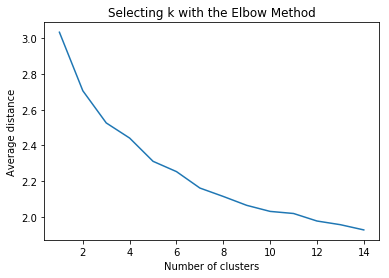

In [169]:
from sklearn.cluster import KMeans
wine_q = dataset[['fixed acidity','volatile acidity',
                  'citric acid','residual sugar','chlorides',
                 'free sulfur dioxide','total sulfur dioxide','density',
                 'pH','sulphates','alcohol']]
# k-means cluster analysis for 1-15 clusters
from scipy.spatial.distance import cdist
clusters = range(1, 15)
meandist=[]

# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean 
# distance my taking the sum divided by the shape

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(wine_q)
    clusassign=model.predict(wine_q)
    meandist.append(sum(np.min(cdist(wine_q, model.cluster_centers_, 'euclidean'), axis=1))
    / wine_q.shape[0])
    
"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 
# pick the fewest number of clusters that reduces the average distance
# If you observe after 3 we can see graph is almost linear



Backpropagation

Backpropagation is a method used in artificial neural networks to calculate a gradient that is needed in the calculation of the weights to be used in the network.It is commonly used to train deep neural networks,a term referring to neural networks with more than one hidden layer.

In this example we will use a very simple network to start with. The network will only have one input and one output layer. We want to make the following predictions from the input:

We will use Numpy to compute the network parameters, weights, activation, and outputs:

We will use the Sigmoid activation function:

In [170]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [171]:
# We could use the ReLU activation function instead:
def relu(z):
    return max(0, z)

In [172]:
def sigmoid_prime(z):
    """The derivative of sigmoid for z."""
    return z * (1 - z)

In [173]:
X = np.array([ [ 0, 0, 1 ],
               [ 0, 1, 1 ],
               [ 1, 0, 1 ],
               [ 1, 1, 1 ] ])
print(X)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


In [174]:
y = np.array([[0,0,1,1]]).T
print(y)

[[0]
 [0]
 [1]
 [1]]


In [175]:
np.random.seed(1)

In [176]:
n_inputs = 3
n_outputs = 1
#Wo = 2 * np.random.random( (n_inputs, n_outputs) ) - 1
Wo = np.random.random( (n_inputs, n_outputs) ) * np.sqrt(2.0/n_inputs)
print(Wo)

[[  3.40497041e-01]
 [  5.88142486e-01]
 [  9.33866473e-05]]


In [177]:
for n in range(10000):
    # forward propagation
    l1 = sigmoid(np.dot(X, Wo))
    
    # compute the loss
    l1_error = y - l1
    #print("l1_error:\n", l1_error)
    
    # multiply the loss by the slope of the sigmoid at l1
    l1_delta = l1_error * sigmoid_prime(l1)
    #print("l1_delta:\n", l1_delta)
    
    #print("error:", l1_error, "\nderivative:", sigmoid(l1, True), "\ndelta:", l1_delta, "\n", "-"*10, "\n")
    # update weights
    Wo += np.dot(X.T, l1_delta)

print("l1:\n", l1)

l1:
 [[ 0.00966614]
 [ 0.00786443]
 [ 0.99358981]
 [ 0.99211861]]
